In [2]:
# pletzer
import numpy as np
masses = {'SWV':np.array([0,1,2,10,30,50,80,100,160])}


def RF(masses):
    a = -0.00088 #mW/Tg
    b = 0.47373
    c = -0.74676
    return a*masses**2+b*masses+c
    
RF(masses['SWV']) # mW/m2

array([-0.74676, -0.27391,  0.19718,  3.90254, 12.67314, 20.73974,
       31.51964, 37.82624, 52.52204])

In [3]:
from openairclim.calc_swv import calc_swv_rf
RF_oac = calc_swv_rf(masses)
RF_oac

{'SWV': array([0.        , 0.        , 0.00019718, 0.00390254, 0.01267314,
        0.02073974, 0.03151964, 0.03782624, 0.05252204])}

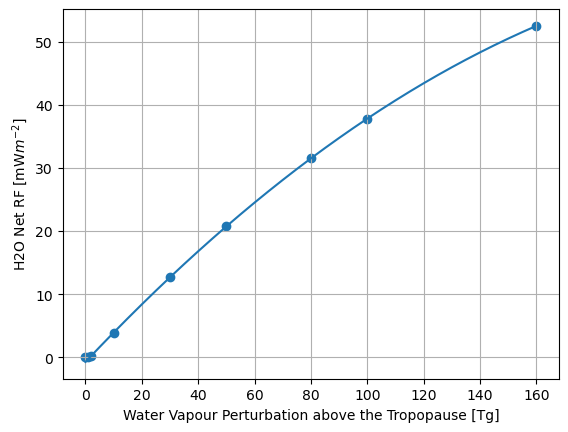

In [4]:
import matplotlib.pyplot as plt
x = np.arange(0, 160, 1)
y = RF(x)
plt.plot(x,y)
plt.scatter(masses['SWV'], calc_swv_rf(masses)['SWV']*1000)
plt.grid()
plt.xlabel(r'Water Vapour Perturbation above the Tropopause [Tg]')
plt.ylabel(r'H2O Net RF [mW'+'$m^{-2}$]')
plt.show()

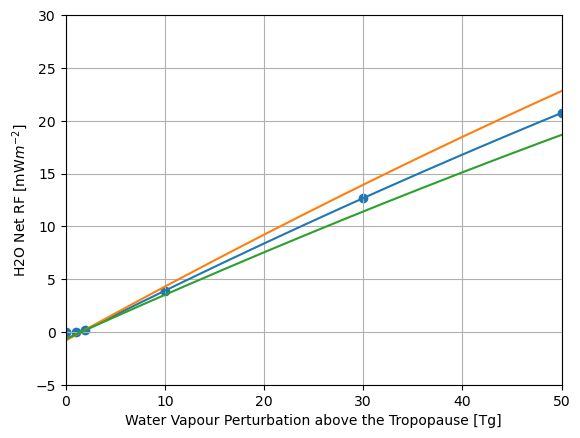

In [8]:
import matplotlib.pyplot as plt
x = np.arange(0, 160, 1)
number_from_paper  = 0.37 #mW/m2 / Tg(H2O)
line_paper_constructed_plus = x*(number_from_paper+0.01)
line_paper_constructed = x*number_from_paper
line_paper_constructed_min = x*(number_from_paper-0.01)
y = RF(x)
y_plus = y*1.1
y_min = y*0.9
plt.plot(x,y)
plt.plot(x,y_plus)
plt.plot(x,y_min)
# plt.plot(x,line_paper_constructed, label= 'normal')
# plt.plot(x,line_paper_constructed_plus, label= 'plus')
# plt.plot(x,line_paper_constructed_min, label= 'min')
plt.scatter(masses['SWV'], calc_swv_rf(masses)['SWV']*1000)
plt.grid()
plt.xlabel(r'Water Vapour Perturbation above the Tropopause [Tg]')
plt.ylabel(r'H2O Net RF [mW'+'$m^{-2}$]')
plt.xlim(0,50)
plt.ylim(-5,30)
plt.show()